In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
import itertools
import time

In [2]:
df = pd.read_csv("Hotel Reservations.csv")

## Primary EDA 

Includes assessment of variable types, descriptive statistics, correlations, count plots of categorical predictors vs. response, box plots of continuous predictors vs. response. 

In [3]:
# Snapshot of data
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
# Variable types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [5]:
# Distributions of continuous variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [6]:
# Calculating number of missing variables
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

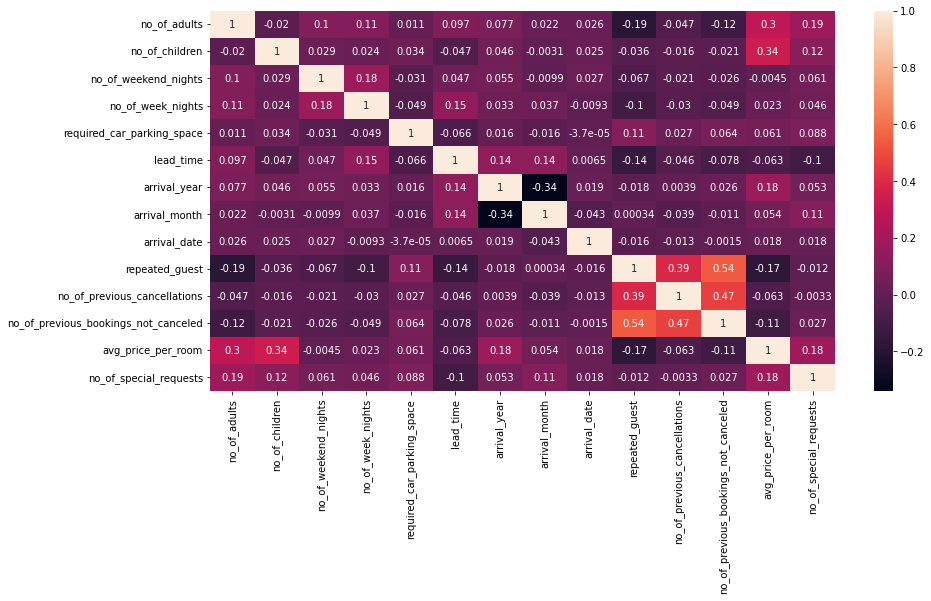

In [7]:
# Determining correlations between continuous predictors
plt.figure(figsize = (14,7));
sns.heatmap(df.corr(), annot = True);

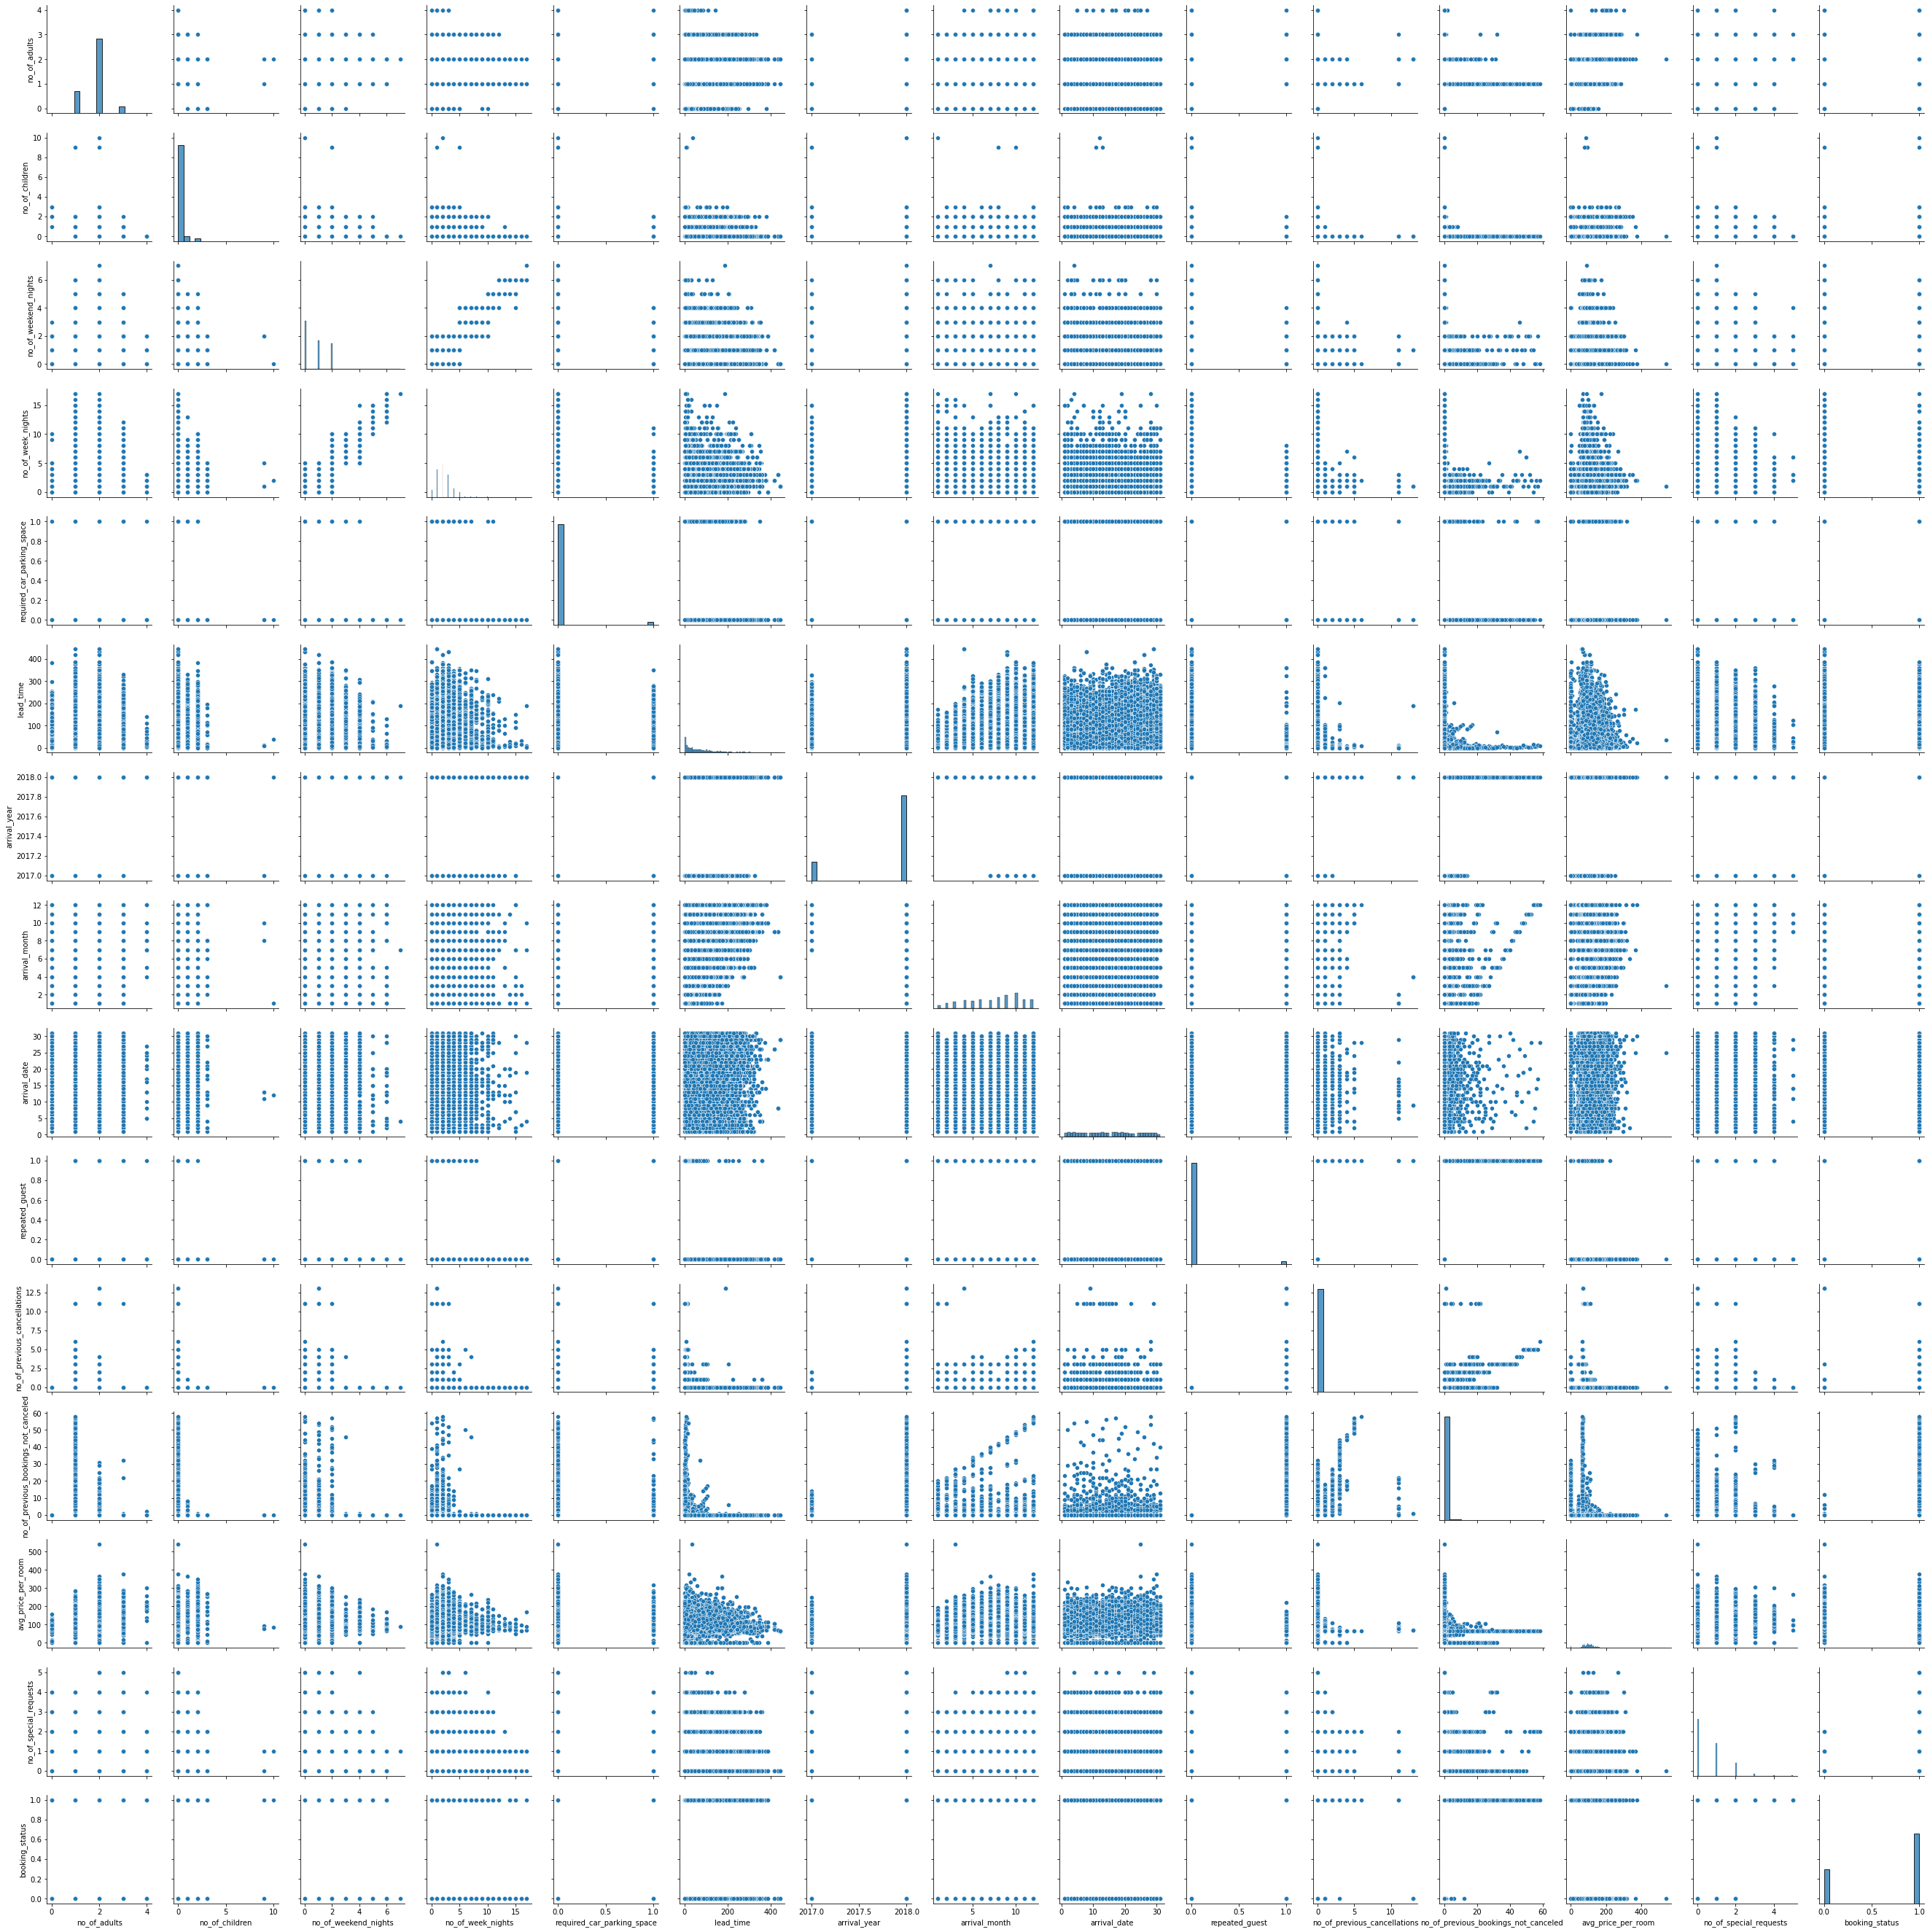

In [60]:
# Visualize distributions and relationships 
sns.pairplot(df)

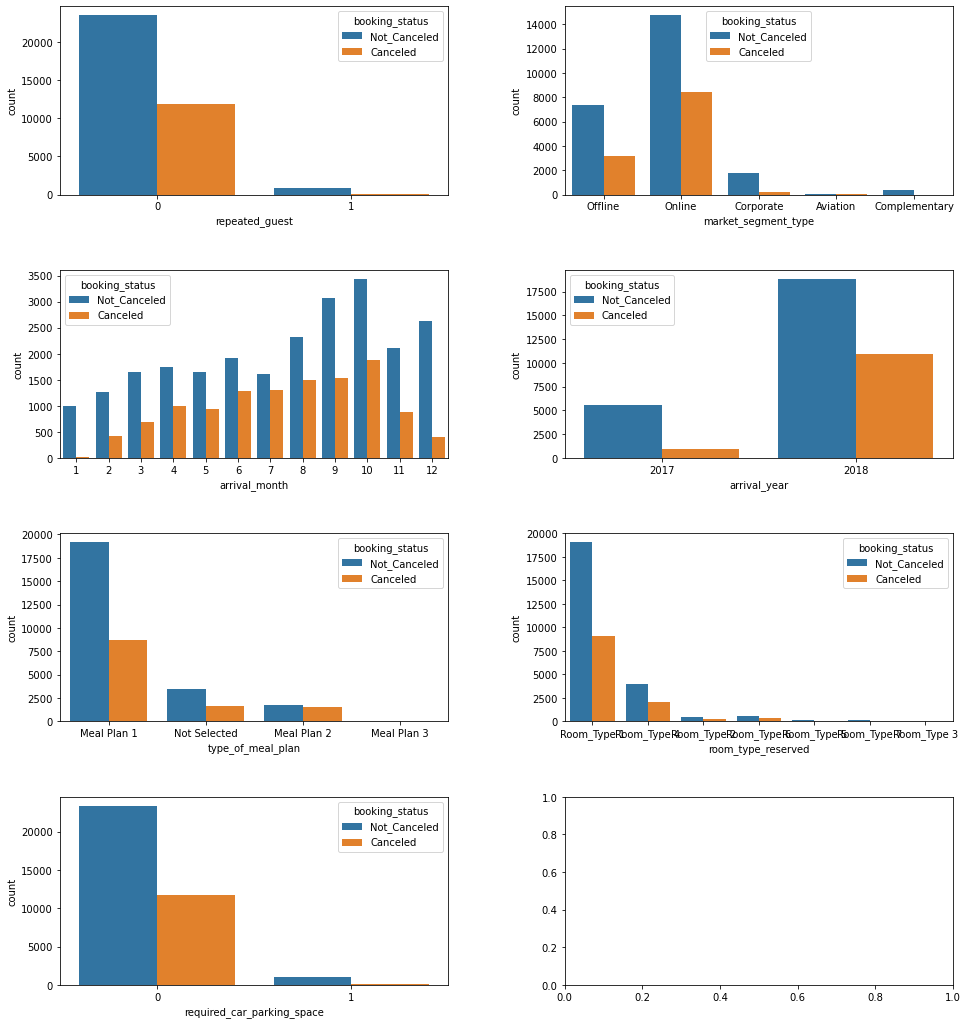

In [8]:
# Relationship between categorical variables and response
fig, ax = plt.subplots(4, 2, figsize=(16, 18));
plt.subplots_adjust(hspace = 0.4, wspace = 0.3);

sns.countplot(data=df, x ='repeated_guest', hue="booking_status", ax=ax[0, 0]);
sns.countplot(data=df,x='market_segment_type',hue='booking_status', ax=ax[0, 1]);
sns.countplot(data=df, x="arrival_month", hue="booking_status", ax=ax[1,0]);
sns.countplot(data=df, x="arrival_year",   hue="booking_status", ax=ax[1,1]);
sns.countplot(data=df, x="type_of_meal_plan",   hue="booking_status", ax=ax[2,0]);
sns.countplot(data=df, x="room_type_reserved",   hue="booking_status", ax=ax[2,1]);
sns.countplot(data=df, x="required_car_parking_space",   hue="booking_status", ax=ax[3,0]);


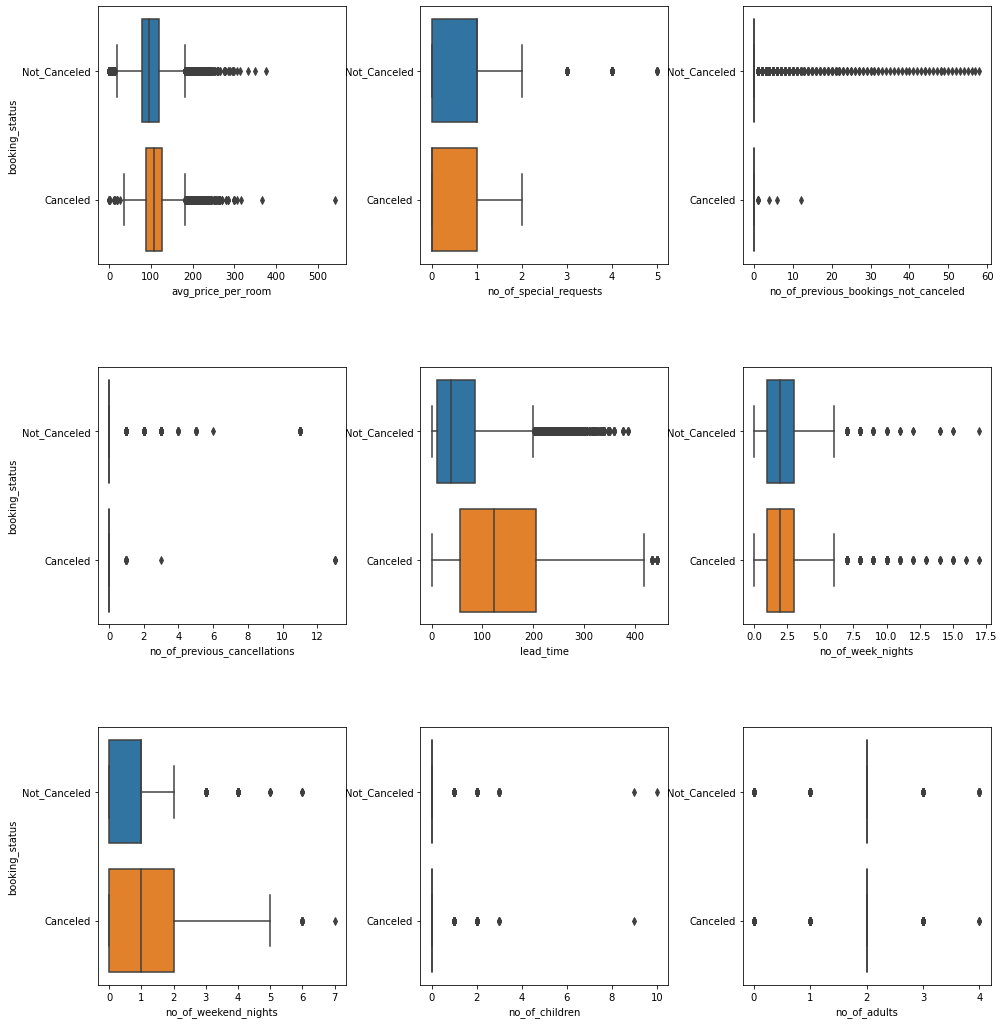

In [9]:
# Relationship between continuous variables and response
fig, ax = plt.subplots(3, 3, figsize=(16, 18));
plt.subplots_adjust(hspace = 0.4, wspace = 0.3);

sns.boxplot(data=df, x ='avg_price_per_room', y ='booking_status', ax=ax[0, 0]);
sns.boxplot(data=df, x ='no_of_special_requests', y ='booking_status', ax=ax[0, 1]).set(ylabel=None);
sns.boxplot(data=df, x ='no_of_previous_bookings_not_canceled', y ='booking_status', ax=ax[0, 2]).set(ylabel=None);
sns.boxplot(data=df, x ='no_of_previous_cancellations', y ='booking_status', ax=ax[1, 0]);
sns.boxplot(data=df, x ='lead_time', y ='booking_status', ax=ax[1, 1]).set(ylabel=None);
sns.boxplot(data=df, x ='no_of_week_nights', y ='booking_status', ax=ax[1, 2]).set(ylabel=None);
sns.boxplot(data=df, x ='no_of_weekend_nights', y ='booking_status', ax=ax[2, 0]);
sns.boxplot(data=df, x ='no_of_children', y ='booking_status', ax=ax[2, 1]).set(ylabel=None);
sns.boxplot(data=df, x ='no_of_adults', y ='booking_status', ax=ax[2, 2]).set(ylabel=None);

In [10]:
# Mapping response to 0 (Not Canceled) and 1 (Canceled)
df['booking_status'].replace(['Canceled', 'Not_Canceled'],[0, 1], inplace=True)

In [11]:
# Proportion of 0 and 1s in response
df.booking_status.value_counts(1)

1    0.672364
0    0.327636
Name: booking_status, dtype: float64

<AxesSubplot:xlabel='booking_status', ylabel='count'>

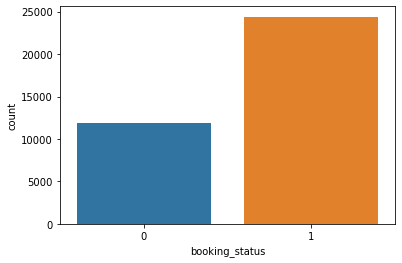

In [12]:
# Visualizing proportion of 0s and 1s in response
sns.countplot(x = 'booking_status', data = df)

In [13]:
# Correlation of continuous variables with response
df.corrwith(df.booking_status)

no_of_adults                           -0.086920
no_of_children                         -0.033078
no_of_weekend_nights                   -0.061563
no_of_week_nights                      -0.092996
required_car_parking_space              0.086185
lead_time                              -0.438538
arrival_year                           -0.179529
arrival_month                           0.011233
arrival_date                           -0.010629
repeated_guest                          0.107287
no_of_previous_cancellations            0.033728
no_of_previous_bookings_not_canceled    0.060179
avg_price_per_room                     -0.142569
no_of_special_requests                  0.253070
booking_status                          1.000000
dtype: float64

Text(0.5, 0, 'Lead Time Binned')

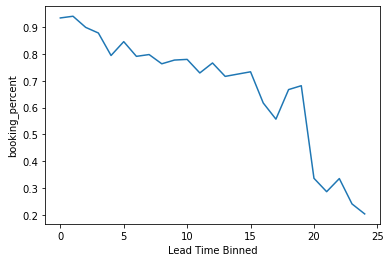

In [47]:
# Line plots of relationship between response and highly correlated continuous predictors 
binned_lead = pd.qcut(train['lead_time'],25,retbins=True)
train['lead_binned'] = binned_lead[0]

lead_data = train.groupby('lead_binned')['booking_status'].agg([('booking_percent','mean'),('nobs','count')]).reset_index(drop=False)
sns.lineplot(x = lead_data.index, y= lead_data['booking_percent'])
plt.xlabel('Lead Time Binned')

In [48]:
lead_data

,lead_binned,booking_percent,nobs
0,"(-0.001, 1.0]",0.934225,1794
1,"(1.0, 2.0]",0.940574,488
2,"(2.0, 5.0]",0.899110,1348
3,"(5.0, 8.0]",0.878119,1042
4,"(8.0, 11.0]",0.794308,773
5,"(11.0, 16.0]",0.845909,1259
6,"(16.0, 21.0]",0.791145,1039
7,"(21.0, 27.0]",0.797820,1009
8,"(27.0, 33.0]",0.763412,1137
9,"(33.0, 39.0]",0.777307,1181


We see that the relationship between lead time and percentage of people canceling a booking displays a very close linear relationship. So people who make their booking between 6 months and 1 year in advance have a lower likelihood of canceling. 

Text(0.5, 0, 'Average Price Per Room Binned')

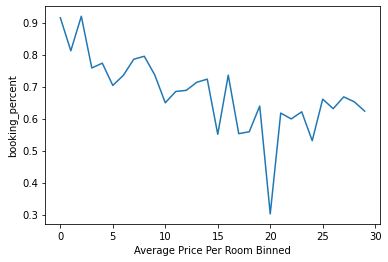

In [45]:
# Line plots of relationship between response and highly correlated continuous predictors 
binned_price = pd.qcut(train['avg_price_per_room'],30,retbins=True)
train['price_binned'] = binned_price[0]

price_data = train.groupby('price_binned')['booking_status'].agg([('booking_percent','mean'),('nobs','count')]).reset_index(drop=False)
sns.lineplot(x = price_data.index, y= price_data['booking_percent'])
plt.xlabel('Average Price Per Room Binned')

Rooms that have a higher average price of about 100 - 500 dollars are less likely to be canceled. The booking_percent seems to plateau, so this predictor may need to be transformed. 

In [46]:
price_data

,price_binned,booking_percent,nobs
0,"(-0.001, 55.737]",0.915105,907
1,"(55.737, 65.0]",0.811868,1483
2,"(65.0, 67.0]",0.919786,374
3,"(67.0, 71.203]",0.758102,864
4,"(71.203, 74.89]",0.773128,908
5,"(74.89, 76.5]",0.703557,1012
6,"(76.5, 79.2]",0.734895,811
7,"(79.2, 81.0]",0.785498,993
8,"(81.0, 85.0]",0.794681,940
9,"(85.0, 87.917]",0.736165,777


Text(0.5, 0, 'Number of Special Requests Binned')

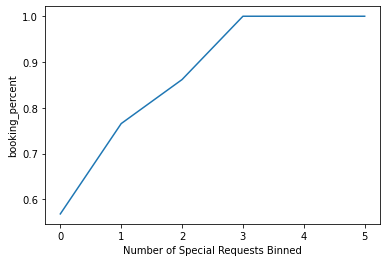

In [55]:
# Line plots of relationship between response and highly correlated continuous predictors 

special_data = train.groupby('no_of_special_requests')['booking_status'].agg([('booking_percent','mean'),('nobs','count')]).reset_index(drop=False)
sns.lineplot(x = special_data.index, y= special_data['booking_percent'])
plt.xlabel('Number of Special Requests Binned')

A higher number of special requests greatly increases the likelihood that the booking will be canceled. 

In [14]:
# Convert categorical variables to dummies and append to df 
dummy_market = pd.get_dummies(df.market_segment_type)
dummy_month = pd.get_dummies(df.arrival_month)
dummy_meal = pd.get_dummies(df.type_of_meal_plan)
dummy_room = pd.get_dummies(df.room_type_reserved)

# add dummy variables to df and drop 1 to avoid perfect multicollinearity in model 
df_dummy = pd.concat([df, dummy_market.drop('Aviation', axis = 1), dummy_month.drop(4, axis = 1), dummy_meal.drop('Meal Plan 3', axis = 1), dummy_room.drop('Room_Type 7', axis = 1)], axis = 1)
df_dummy.columns = df_dummy.columns.astype(str)
df_dummy.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,12,Meal Plan 1,Meal Plan 2,Not Selected,Room_Type 1,Room_Type 2,Room_Type 3,Room_Type 4,Room_Type 5,Room_Type 6
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,0,1,0,0,1,0,0,0,0,0
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,0,0,0,1,1,0,0,0,0,0
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,0,1,0,0,1,0,0,0,0,0
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,0,1,0,0,1,0,0,0,0,0
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,...,0,0,0,1,1,0,0,0,0,0


In [15]:
# Remove spaces from column names 
df_dummy.columns = df_dummy.columns.str.replace(' ', '')

# Convert month number to name in columns 
df_dummy.rename(columns={'1': 'January', '2': 'February', '3': 'March', 
                         '5': 'May', '6': 'June', '7': 'July', 
                        '8': 'August', '9': 'September', '10': 'October',
                        '11': 'November', '12': 'December'}, inplace=True)

df_dummy.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,December,MealPlan1,MealPlan2,NotSelected,Room_Type1,Room_Type2,Room_Type3,Room_Type4,Room_Type5,Room_Type6
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,0,1,0,0,1,0,0,0,0,0
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,0,0,0,1,1,0,0,0,0,0
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,0,1,0,0,1,0,0,0,0,0
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,0,1,0,0,1,0,0,0,0,0
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,...,0,0,0,1,1,0,0,0,0,0


In [16]:
# Split train and test datasets
y = df_dummy.booking_status
X = df_dummy.drop('booking_status', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, shuffle=True, stratify=y)


In [25]:
# Split train and test datasets
train, test = train_test_split(df_dummy, test_size=0.25, random_state=25, shuffle=True)
train.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,December,MealPlan1,MealPlan2,NotSelected,Room_Type1,Room_Type2,Room_Type3,Room_Type4,Room_Type5,Room_Type6
6093,INN06094,2,0,2,3,Meal Plan 1,0,Room_Type 4,85,2018,...,0,1,0,0,0,0,0,1,0,0
11877,INN11878,1,0,0,3,Meal Plan 1,0,Room_Type 1,166,2018,...,0,1,0,0,1,0,0,0,0,0
27585,INN27586,2,0,2,2,Meal Plan 1,0,Room_Type 2,159,2018,...,0,1,0,0,0,1,0,0,0,0
28306,INN28307,2,0,1,0,Meal Plan 1,0,Room_Type 1,258,2018,...,0,1,0,0,1,0,0,0,0,0
19753,INN19754,2,0,0,3,Meal Plan 1,0,Room_Type 1,116,2018,...,0,1,0,0,1,0,0,0,0,0


In [18]:
# drop response from test dataset 
test = test.drop('booking_status', axis = 1)

## Baseline Model 
Evaluating model with all predictor variables. Categorical predictors have been transformed to dummy variables. 

In [19]:
# Baseline model with all predictors (continuous and categorical) and no interactions 
baseline_model = sm.logit('booking_status~no_of_adults+no_of_children+no_of_weekend_nights+\
       no_of_week_nights+required_car_parking_space+\
       lead_time+arrival_year+\
       arrival_date+repeated_guest+\
       no_of_previous_cancellations+no_of_previous_bookings_not_canceled+\
       avg_price_per_room+no_of_special_requests+\
       Complementary+Corporate+Offline+Online+January+February+March+May+June+\
       July+August+September+October+November+December+MealPlan1+MealPlan2+\
       NotSelected+Room_Type1+Room_Type2+Room_Type3+\
       Room_Type4+Room_Type5+Room_Type6', data = train).fit()
baseline_model.summary()

         Current function value: 0.406889
         Iterations: 35


C:\Users\hodaf\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                27206
Model:                          Logit   Df Residuals:                    27168
Method:                           MLE   Df Model:                           37
Date:                Fri, 03 Mar 2023   Pseudo R-squ.:                  0.3553
Time:                        16:18:07   Log-Likelihood:                -11070.
converged:                      False   LL-Null:                       -17170.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                              953.3177   3.45e+04      0.028      0.978   -6.67e+04    6.86e+04
no_of_adults                            -0.1417      0.038     -3.735      0.000      -0.216      -0.067
no_of_children                          -0.2050      0.059     -3.451      0.001      -0.321      -0.089
no_of_weekend_nights                    -0.1310      0.020     -6.638      0.000      -0.170      -0.092
no_of_week_nights                       -0.0563      0.012     -4.563      0.000      -0.080      -0.032
required_car_parking_space               1.7396      0.142     12.226      0.000       1.461       2.019
lead_time                               -0.0162      0.000    -57.587      0.000      -0.017      -0.016
arrival_year                            -0.4718      0.062     -7.561      0.000      -0.594      -0.350
arrival_date                            -0.0026      0.002     -1.354      0.176      -0.006       0.001
repeated_guest                           2.0207      0.483      4.181      0.000       1.074       2.968
no_of_previous_cancellations            -0.3279      0.095     -3.465      0.001      -0.513      -0.142
no_of_previous_bookings_not_canceled     0.0903      0.077      1.173      0.241      -0.061       0.241
avg_price_per_room                      -0.0194      0.001    -23.911      0.000      -0.021      -0.018
no_of_special_requests                   1.5720      0.030     51.984      0.000       1.513       1.631
Complementary                           20.6477   3752.665      0.006      0.996   -7334.441    7375.737
Corporate                                0.8690      0.253      3.437      0.001       0.373       1.365
Offline                                  1.9568      0.242      8.088      0.000       1.483       2.431
Online                                   0.1045      0.239      0.438      0.662      -0.363       0.572
January                                  2.2706      0.251      9.051      0.000       1.779       2.762
February                                -0.5317      0.093     -5.726      0.000      -0.714      -0.350
March                                   -0.2699      0.082     -3.303      0.001      -0.430      -0.110
May                                      0.3591      0.081      4.449      0.000       0.201       0.517
June                                     0.1412      0.077      1.843      0.065      -0.009       0.291
July                                     0.2188      0.079      2.779      0.005       0.065       0.373
August                                   0.1996      0.077      2.576      0.010       0.048       0.351
September                                0.3166      0.079      4.013      0.000       0.162       0.471
October                                 -0.0305      0.075     -0.407      0.684      -0.177       0.116
November                                -0.3207      0.083     -3.843      0.000      -0.48

In [20]:
baseline_model.bic

22527.66311401963

In [22]:
#Function to compute confusion matrix and prediction accuracy on test/train data
def confusion_matrix_data(data,actual_values,model,cutoff=0.5):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    print("ROC-AUC = {:.1%}".format(auc_value))

Classification accuracy = 80.6%
Precision = 80.8%
TPR or Recall = 93.3%
FNR = 6.7%
FPR = 45.8%
ROC-AUC = 87.5%


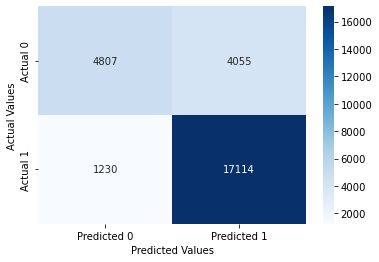

In [23]:
# Evaluating baseline model on train data
confusion_matrix_data(train, train.booking_status, baseline_model, cutoff = 0.4)

Classification accuracy = 79.8%
Precision = 79.8%
TPR or Recall = 93.3%
FNR = 6.7%
FPR = 47.3%
ROC-AUC = 86.4%


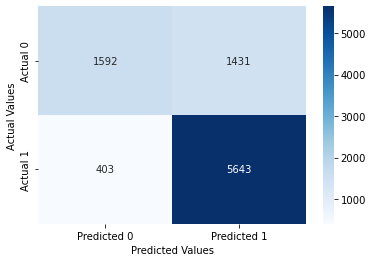

In [26]:
# Evaluating baseline model on test data
confusion_matrix_data(test, test.booking_status, baseline_model, cutoff = 0.4)

In [28]:
# Baseline model with only continuous and binary categorical variables 
baseline_cont_model = sm.logit('booking_status~no_of_adults+no_of_children+no_of_weekend_nights+\
       no_of_week_nights+required_car_parking_space+\
       lead_time+arrival_year+\
       arrival_date+repeated_guest+\
       no_of_previous_cancellations+no_of_previous_bookings_not_canceled+\
       avg_price_per_room+no_of_special_requests', data = train).fit()
baseline_cont_model.summary()

Optimization terminated successfully.
         Current function value: 0.454970
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                27206
Model:                          Logit   Df Residuals:                    27192
Method:                           MLE   Df Model:                           13
Date:                Fri, 03 Mar 2023   Pseudo R-squ.:                  0.2791
Time:                        16:23:54   Log-Likelihood:                -12378.
converged:                       True   LL-Null:                       -17170.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                             1960.2624    100.223     19.559      0.000    1763.829    2156.695
no_of_adults                            -0.1899      0.033     -5.754      0.000      -0.255      -0.125
no_of_children                          -0.0154      0.042     -0.363      0.717      -0.098       0.068
no_of_weekend_nights                    -0.1669      0.018     -9.175      0.000      -0.203      -0.131
no_of_week_nights                       -0.0526      0.011     -4.675      0.000      -0.075      -0.031
required_car_parking_space               1.3970      0.136     10.237      0.000       1.130       1.665
lead_time                               -0.0122      0.000    -58.370      0.000      -0.013      -0.012
arrival_year                            -0.9696      0.050    -19.520      0.000      -1.067      -0.872
arrival_date                            -0.0015      0.002     -0.827      0.408      -0.005       0.002
repeated_guest                           2.1063      0.430      4.902      0.000       1.264       2.948
no_of_previous_cancellations            -0.2415      0.076     -3.197      0.001      -0.390      -0.093
no_of_previous_bookings_not_canceled     0.0954      0.085      1.128      0.259      -0.070       0.261
avg_price_per_room                      -0.0180      0.001    -31.509      0.000      -0.019      -0.017
no_of_special_requests                   1.1698      0.026     44.880      0.000       1.119       1.221
========================================================================================================
"""

Classification accuracy = 78.3%
Precision = 78.1%
TPR or Recall = 94.3%
FNR = 5.7%
FPR = 54.7%
ROC-AUC = 83.8%


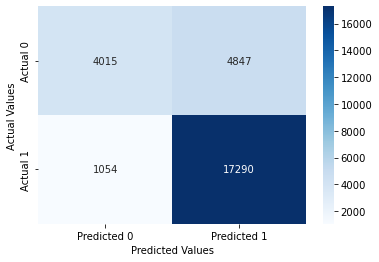

In [30]:
# Evaluating baseline continous model on train data
confusion_matrix_data(train, train.booking_status, baseline_cont_model, cutoff = 0.4)

Classification accuracy = 77.4%
Precision = 77.1%
TPR or Recall = 94.1%
FNR = 5.9%
FPR = 56.1%
ROC-AUC = 82.8%


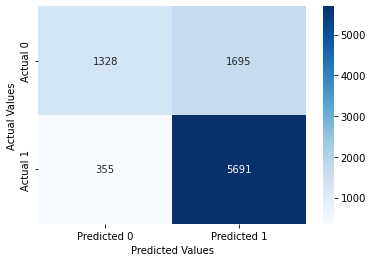

In [31]:
# Evaluating baseline continous model on test data
confusion_matrix_data(test, test.booking_status, baseline_cont_model, cutoff = 0.4)

## EDA-Based Models
Models with variable transformations and interactions based on EDA. 

In [66]:
# Initial Logit model 
logit_model_1 = sm.logit('booking_status~np.log(lead_time+1)+np.log(avg_price_per_room+1)+no_of_special_requests',
                        data = train).fit()
logit_model_1.summary()

Optimization terminated successfully.
         Current function value: 0.478240
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                27206
Model:                          Logit   Df Residuals:                    27202
Method:                           MLE   Df Model:                            3
Date:                Fri, 03 Mar 2023   Pseudo R-squ.:                  0.2422
Time:                        22:03:42   Log-Likelihood:                -13011.
converged:                       True   LL-Null:                       -17170.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         13.4977      0.288     46.883      0.000      12.933      14.062
np.log(lead_time + 1)             -0.8436      0.015    -57.079      0.000      -0.873      -0.815
np.log(avg_price_per_room + 1)    -2.1477      0.058    -37.061      0.000      -2.261      -2.034
no_of_special_requests             1.0933      0.024     45.054      0.000       1.046       1.141
==================================================================================================
"""

Classification accuracy = 77.1%
Precision = 77.4%
TPR or Recall = 93.3%
FNR = 6.7%
FPR = 56.3%
ROC-AUC = 82.2%


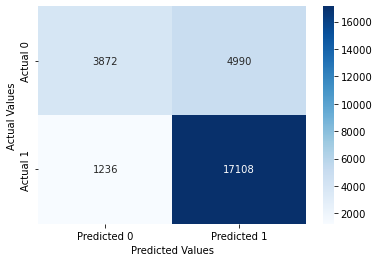

In [67]:
confusion_matrix_data(train, train.booking_status, logit_model_1, cutoff = 0.4)

Classification accuracy = 76.0%
Precision = 76.3%
TPR or Recall = 92.7%
FNR = 7.3%
FPR = 57.5%
ROC-AUC = 81.1%


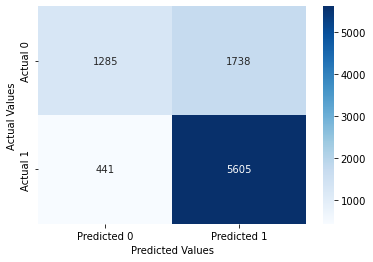

In [68]:
confusion_matrix_data(test, test.booking_status, logit_model_1, cutoff = 0.4)

In [69]:
# Logistic regression model with only continuous variables
logit_model_2 = sm.logit('booking_status~no_of_special_requests+np.log(lead_time+1)+no_of_weekend_nights+\
no_of_weekend_nights*no_of_week_nights+no_of_previous_cancellations+\
no_of_previous_cancellations*no_of_previous_bookings_not_canceled+\
np.log(avg_price_per_room+1)+np.log(avg_price_per_room+1)*no_of_adults+np.log(avg_price_per_room+1)*no_of_children', data = train).fit()
logit_model_2.summary()

Optimization terminated successfully.
         Current function value: 0.473369
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                27206
Model:                          Logit   Df Residuals:                    27192
Method:                           MLE   Df Model:                           13
Date:                Fri, 03 Mar 2023   Pseudo R-squ.:                  0.2500
Time:                        22:04:48   Log-Likelihood:                -12878.
converged:                       True   LL-Null:                       -17170.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================================================
                                                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                            15.7306      1.040     15.131      0.000      13.693      17.768
no_of_special_requests                                                1.1354      0.025     45.284      0.000       1.086       1.185
np.log(lead_time + 1)                                                -0.8423      0.015    -55.044      0.000      -0.872      -0.812
no_of_weekend_nights                                                  0.0626      0.029      2.136      0.033       0.005       0.120
no_of_week_nights                                                     0.0940      0.018      5.241      0.000       0.059       0.129
no_of_weekend_nights:no_of_week_nights                               -0.0733      0.008     -9.010      0.000      -0.089      -0.057
no_of_previous_cancellations                                         -0.0735      0.080     -0.916      0.360      -0.231       0.084
no_of_previous_bookings_not_canceled                                  0.4605      0.150      3.079      0.002       0.167       0.754
no_of_previous_cancellations:no_of_previous_bookings_not_canceled    -0.0368      0.019     -1.962      0.050      -0.074   -4.17e-05
np.log(avg_price_per_room + 1)                                       -2.5905      0.222    -11.694      0.000      -3.025      -2.156
no_of_adults                                                         -1.3215      0.510     -2.589      0.010      -2.322      -0.321
np.log(avg_price_per_room + 1):no_of_adults                           0.2485      0.108      2.300      0.021       0.037       0.460
no_of_children                                                       -1.5019      0.524     -2.866      0.004      -2.529      -0.475
np.log(avg_price_per_room + 1):no_of_children                         0.2840      0.105      2.699      0.007       0.078       0.490
=====================================================================================================================================
"""

Classification accuracy = 77.3%
Precision = 77.7%
TPR or Recall = 93.1%
FNR = 6.9%
FPR = 55.4%
ROC-AUC = 82.7%


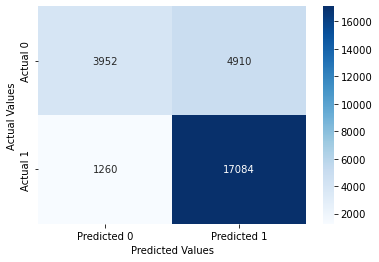

In [70]:
confusion_matrix_data(train, train.booking_status, logit_model_2, cutoff = 0.4)

Classification accuracy = 76.2%
Precision = 76.6%
TPR or Recall = 92.5%
FNR = 7.5%
FPR = 56.5%
ROC-AUC = 81.5%


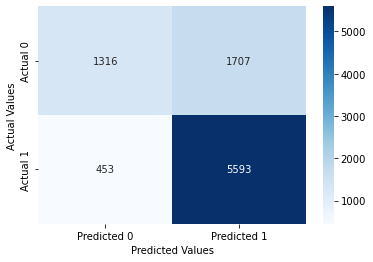

In [71]:
confusion_matrix_data(test, test.booking_status, logit_model_2, cutoff = 0.4)

In [73]:
# Logistic regression model adding categorical variables
logit_model_3 = sm.logit('booking_status~no_of_special_requests+np.log(lead_time+1)+no_of_weekend_nights+\
np.log(avg_price_per_room+1)+avg_price_per_room*no_of_adults+avg_price_per_room*no_of_children+\
repeated_guest', data = train).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.474553
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                27206
Model:                          Logit   Df Residuals:                    27192
Method:                           MLE   Df Model:                           13
Date:                Fri, 03 Mar 2023   Pseudo R-squ.:                  0.2500
Time:                        22:06:30   Log-Likelihood:                -12878.
converged:                       True   LL-Null:                       -17170.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================================================
                                                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                            15.7306      1.040     15.131      0.000      13.693      17.768
no_of_special_requests                                                1.1354      0.025     45.284      0.000       1.086       1.185
np.log(lead_time + 1)                                                -0.8423      0.015    -55.044      0.000      -0.872      -0.812
no_of_weekend_nights                                                  0.0626      0.029      2.136      0.033       0.005       0.120
no_of_week_nights                                                     0.0940      0.018      5.241      0.000       0.059       0.129
no_of_weekend_nights:no_of_week_nights                               -0.0733      0.008     -9.010      0.000      -0.089      -0.057
no_of_previous_cancellations                                         -0.0735      0.080     -0.916      0.360      -0.231       0.084
no_of_previous_bookings_not_canceled                                  0.4605      0.150      3.079      0.002       0.167       0.754
no_of_previous_cancellations:no_of_previous_bookings_not_canceled    -0.0368      0.019     -1.962      0.050      -0.074   -4.17e-05
np.log(avg_price_per_room + 1)                                       -2.5905      0.222    -11.694      0.000      -3.025      -2.156
no_of_adults                                                         -1.3215      0.510     -2.589      0.010      -2.322      -0.321
np.log(avg_price_per_room + 1):no_of_adults                           0.2485      0.108      2.300      0.021       0.037       0.460
no_of_children                                                       -1.5019      0.524     -2.866      0.004      -2.529      -0.475
np.log(avg_price_per_room + 1):no_of_children                         0.2840      0.105      2.699      0.007       0.078       0.490
=====================================================================================================================================
"""

Classification accuracy = 77.2%
Precision = 77.5%
TPR or Recall = 93.3%
FNR = 6.7%
FPR = 56.1%
ROC-AUC = 82.5%


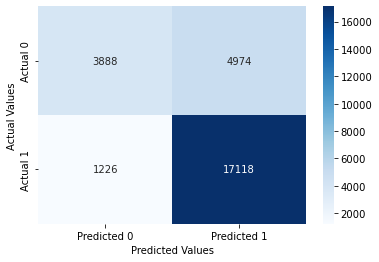

In [74]:
confusion_matrix_data(train, train.booking_status, logit_model_3, cutoff = 0.4)

Classification accuracy = 76.1%
Precision = 76.5%
TPR or Recall = 92.6%
FNR = 7.4%
FPR = 56.9%
ROC-AUC = 81.4%


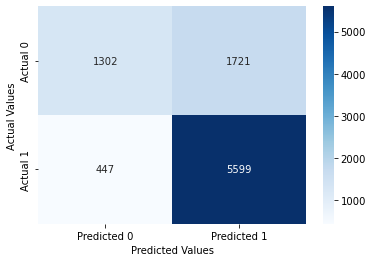

In [75]:
confusion_matrix_data(test, test.booking_status, logit_model_3, cutoff = 0.4)

## Variable Selection

In [76]:
#Creating a set of predictors from which we need to find the best subset of predictors
X = train[['no_of_adults', 'no_of_children','no_of_weekend_nights','no_of_week_nights','type_of_meal_plan',
           'required_car_parking_space', 'room_type_reserved','lead_time','arrival_year','arrival_month',
            'arrival_date','market_segment_type','repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled','avg_price_per_room', 'no_of_special_requests','Complementary',
        'Corporate','Offline', 'Online','January',
       'February', 'March', 'May', 'June', 'July', 'August', 'September',
       'October', 'November', 'December', 'MealPlan1', 'MealPlan2',
       'NotSelected', 'Room_Type1', 'Room_Type2', 'Room_Type3', 'Room_Type4',
       'Room_Type5', 'Room_Type6']]

In [85]:
#Function to develop a model based on all predictors in predictor_subset
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = sm.logit('booking_status~' + '+'.join(predictor_subset), data = train).fit()
    pred_values = model.predict(train)
    actual_values = train.booking_status
# Specify the bins
    bins=np.array([0,0.4,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    return {"model":model, "Accuracy":accuracy}

In [86]:
#Function to find the best predictor out of p-k predictors and add it to the model containing the k predictors
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['Accuracy'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [87]:
def forward_selection():
    models_best = pd.DataFrame(columns=["Accuracy", "model"])

    tic = time.time()
    predictors = []

    for i in range(1,len(X.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [88]:
models_best = forward_selection()

Optimization terminated successfully.
         Current function value: 0.627206
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.630572
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.629293
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.626756
         Iterations 5
         Current function value: 0.627067
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.626106
         Iterations 6


C:\Users\hodaf\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.630420
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.535235
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.613451
         Iterations 20
Optimization terminated successfully.
         Current function value: 0.631053
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.631083
         Iterations 4
         Current function value: 0.617300
         Iterations: 35


C:\Users\hodaf\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.622996
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.630324
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.624337
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.620578
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.593321
         Iterations 6
         Current function value: 0.626831
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.623697
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.630418
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.625475
         Iterations 5


C:\Users\hodaf\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.622422
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.630380
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.631056
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.630907
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.630066
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.628478
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.629885
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.631114
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.630769
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.630855
  

C:\Users\hodaf\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.532298
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.531645
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.525422
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.531819
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.535217
         Iterations 5


C:\Users\hodaf\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\hodaf\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix